**K-Nearest Neighbors (KNN)** is a classification algorithm that assigns a class label to a data point based on the class labels of its k nearest neighbors in the training set. It is a **non-parametric algorithm**, which means that it does not make any assumptions about the distribution of the data.

The KNN algorithm works as follows:

Choose a value of k (the number of nearest neighbors to consider).
For each data point in the test set, compute its distance to all data points in the training set.
Select the k nearest neighbors based on their distances.
Assign the class label that appears most frequently among the k nearest neighbors to the test point.

Hint:

*   np.linalg.norm(DATA  - SAMPLE, axis=1) for euclidean distance
*   np.sum(np.abs(DATA  - SAMPLE, axis=1)) for manhattan distance
*   np.argsort(distances) to compute the sorted index w.r.t the distance
*   Counter(nearest_labels).most_common(1)[0][0] create counters and retrieve the most common objects in a counter




In [11]:
import numpy as np
import time
from collections import Counter
import math

In [24]:
class KNN:
  def __init__(self, k_neighbour=2, distance="euclidean"):
    self.k_neighbour = k_neighbour
    self.distance = distance

  def fit(self, X, Y):
    # used only to store data
    self.X = X
    self.Y = Y

  def predict(self, input_test):
    y_predict = []

    for test_sample in input_test:
      if self.distance == "euclidean":
          distances = np.linalg.norm(self.X  - test_sample, axis=1)
      elif self.distance == 'manhattan':
          distances = np.sum(np.abs(self.X  - test_sample), axis=1)
      else:
          distances = np.power(np.sum(np.power(np.abs(self.X_train - x), self.distance), axis=1), 1/self.distance)

      # Select the k nearest neighbors
      nearest_indices = np.argsort(distances)[:self.k_neighbour]
      nearest_labels = self.Y[nearest_indices]

      # Assign the class label that appears most frequently among the k nearest neighbors
      label = Counter(nearest_labels).most_common(1)[0][0]
      y_predict.append(label)

    return np.array(y_predict)






In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
knn = KNN(k_neighbour=5, distance='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


<ipython-input-26-8ad551597b1c>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', cmap='viridis', label=iris.target_names[0])
<ipython-input-26-8ad551597b1c>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', cmap='viridis', label=iris.target_names[1])
<ipython-input-26-8ad551597b1c>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter3 = ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='r', cmap='viridis', label=iris.target_names[2])
<ipython-input-26-8ad551597b1c>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter4 = ax.scatter(X_test[:, 0], X_test[:, 1], c='k', cmap='viridis', marker='x', label='Predicted Label')


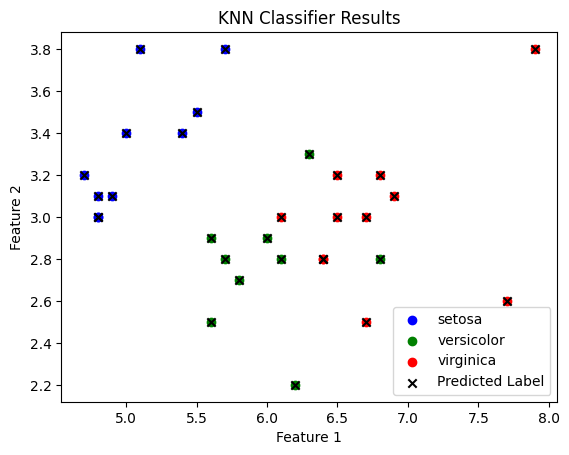

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Create scatter plots of the test data with colored points representing the true and predicted labels
fig, ax = plt.subplots()
scatter1 = ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', cmap='viridis', label=iris.target_names[0])
scatter2 = ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', cmap='viridis', label=iris.target_names[1])
scatter3 = ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='r', cmap='viridis', label=iris.target_names[2])
scatter4 = ax.scatter(X_test[:, 0], X_test[:, 1], c='k', cmap='viridis', marker='x', label='Predicted Label')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('KNN Classifier Results')
handles = [scatter1, scatter2, scatter3, scatter4]
labels = [h.get_label() for h in handles]
ax.legend(handles=handles, labels=labels)
plt.show()